In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import seaborn as sns

#### generate customer profiles and terminal profiles

In [105]:
def generate_customer_profiles_table(n_customers, random_state=0):
    np.random.seed(random_state)

    customer_id_properties = []

    for customer_id in range(n_customers):

        x_customer_id =  np.random.uniform(0,100) #geographical location of X
        y_customer_id = np.random.uniform(0,100) #geographical locatiion of Y

        mean_amount = np.random.uniform(5, 100) #mean of the transaction amounts for the customers
        std_amount = mean_amount/2 #standard deviation of the transaction amounts for the customers

        mean_nb_tx_per_day = np.random.uniform(0,4) #average number of transaction per day for the customer

        customer_id_properties.append([
            customer_id, x_customer_id, y_customer_id, mean_amount, std_amount, mean_nb_tx_per_day
        ])
    customer_profiles_table = pd.DataFrame(customer_id_properties, columns=['CUSTOMER_ID',
                                                                                'x_customer_id', 'y_customer_id',
                                                                                'mean_amount','std_amount',
                                                                                'mean_nb_tx_per_day'])
    return customer_profiles_table

def generate_terminal_profiles_table(n_terminals, random_state=0):

    np.random.seed(random_state)

    terminal_id_properties = []

    for terminal_id in range(n_terminals):

        x_terminal_id = np.random.uniform(0,100)
        y_terminal_id = np.random.uniform(0,100)

        terminal_id_properties.append([terminal_id,
                                       x_terminal_id, y_terminal_id])

    terminal_profile_table = pd.DataFrame(terminal_id_properties, columns=['TERMINAL_ID', 'x_terminal_id', 'y_terminal_id'])

    return terminal_profile_table

In [106]:
n_customers = 5
customer_profiles_table = generate_customer_profiles_table(5)
customer_profiles_table


,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day
0,0,54.881350,71.518937,62.262521,31.131260,2.179533
1,1,42.365480,64.589411,46.570785,23.285393,3.567092
2,2,96.366276,38.344152,80.213879,40.106939,2.115580
3,3,56.804456,92.559664,11.748426,5.874213,0.348517
4,4,2.021840,83.261985,78.924891,39.462446,3.480049


In [107]:
n_terminals = 5
terminal_profiles_table = generate_terminal_profiles_table(n_terminals, random_state = 0)
terminal_profiles_table

,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


In [108]:
x_y_customer = customer_profiles_table.iloc[4][['x_customer_id','y_customer_id']].values.astype(float)

x_y_terminals = terminal_profiles_table[['x_terminal_id', 'y_terminal_id']].values.astype(float)


squared_diff_x_y = np.square(x_y_customer - x_y_terminals)
dist_x_y = np.sqrt(np.sum(squared_diff_x_y, axis=1))
np.where(dist_x_y < 60)[0]



array([0, 2, 3])

#### Calculate distance between customers and terminals

In [109]:
def get_list_terminals_within_radius(customer_profile, x_y_terminals, r):
    x_y_customer = customer_profile[['x_customer_id', 'y_customer_id']].values.astype(float)

    squared_diff_x_y = np.square(x_y_customer - x_y_terminals) #squared difference in coordinates between customer and terminal locations
    dist_x_y = np.sqrt(np.sum(squared_diff_x_y, axis=1)) #distance between customer and terminal

    available_terminals = list(np.where(dist_x_y < r)[0])

    return available_terminals




In [110]:
x_y_terminals = terminal_profiles_table[['x_terminal_id','y_terminal_id']].values.astype(float)
get_list_terminals_within_radius(customer_profiles_table.iloc[4], x_y_terminals=x_y_terminals, r=50)


[np.int64(2), np.int64(3)]

In [111]:
terminal_profiles_table

,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


Text(0, 0.5, 'y_terminal_id')

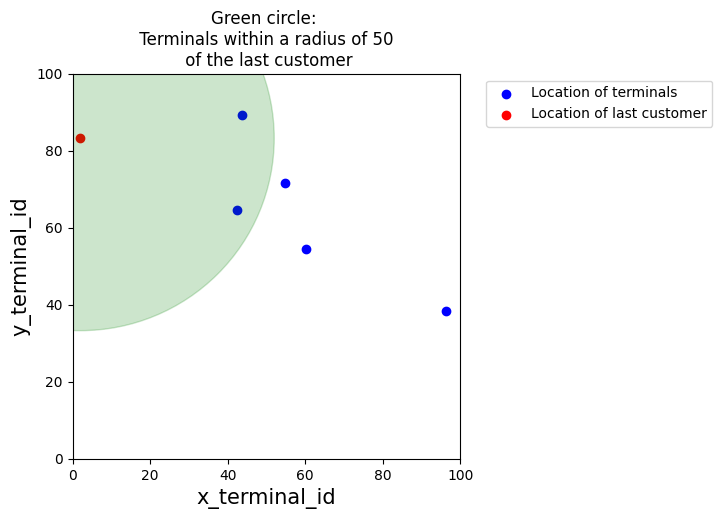

In [112]:
terminal_available_to_customer_fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(terminal_profiles_table.x_terminal_id.values,
           terminal_profiles_table.y_terminal_id.values,
           color='blue', label='Location of terminals')

customer_id = 4
ax.scatter(customer_profiles_table.iloc[customer_id].x_customer_id,
           customer_profiles_table.iloc[customer_id].y_customer_id,
           color='red', label='Location of last customer')

ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

circ = plt.Circle((customer_profiles_table.iloc[customer_id].x_customer_id,
                  customer_profiles_table.iloc[customer_id].y_customer_id), radius=50, color='g',alpha=0.2)

ax.add_patch(circ)

fontsize = 15

ax.set_title("Green circle: \n Terminals within a radius of 50 \n of the last customer")
ax.set_xlim([0,100])
ax.set_ylim([0,100])

ax.set_xlabel('x_terminal_id', fontsize=fontsize)
ax.set_ylabel('y_terminal_id', fontsize=fontsize)


In [113]:
customer_profiles_table['available_terminal'] = customer_profiles_table.apply(lambda x:get_list_terminals_within_radius(x, x_y_terminals=x_y_terminals, r=50), axis=1)
customer_profiles_table

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminal
0,0,54.881350,71.518937,62.262521,31.131260,2.179533,"[0, 1, 2, 3]"
1,1,42.365480,64.589411,46.570785,23.285393,3.567092,"[0, 1, 2, 3]"
2,2,96.366276,38.344152,80.213879,40.106939,2.115580,"[1, 4]"
3,3,56.804456,92.559664,11.748426,5.874213,0.348517,"[0, 1, 2, 3]"
4,4,2.021840,83.261985,78.924891,39.462446,3.480049,"[2, 3]"


#### Generate transactions table

In [114]:
def generate_transactions_table(customer_profile, start_date="2018-04-01", nb_days = 10):

    customer_transactions = []

    random.seed(int(customer_profile.CUSTOMER_ID))
    np.random.seed(int(customer_profile.CUSTOMER_ID))

    for day in range(nb_days):
        nb_tx = np.random.poisson(customer_profile.mean_nb_tx_per_day) #number of transaction that day

        if nb_tx > 0:
            for tx in range(nb_tx):

                time_tx = int(np.random.normal(86400/2, 20000)) #around noon, std 20000

                if (time_tx>0) and (time_tx<86400):

                    amount = np.random.normal(customer_profile.mean_amount, customer_profile.std_amount)

                    if amount<0:
                        amount = np.random.uniform(0, customer_profile.mean_amount*2)

                    amount = np.round(amount, decimals=2)

                    if len(customer_profile.available_terminal) > 0:
                        terminal_id = random.choice(customer_profile.available_terminal)

                        customer_transactions.append([time_tx+day*86400, day, customer_profile.CUSTOMER_ID, terminal_id, amount])

    customer_transactions = pd.DataFrame(customer_transactions, columns=['TX_TIME_SECONDS', 'TX_TIME_DAYS', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT'])

    if len(customer_transactions) > 0:
        customer_transactions['TX_DATETIME'] = pd.to_datetime(customer_transactions['TX_TIME_SECONDS'], unit='s', origin=start_date)
        customer_transactions = customer_transactions[['TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS']]

    return customer_transactions



In [115]:
transaction_table_customer_0=generate_transactions_table(customer_profiles_table.iloc[0],
                                                         start_date = "2018-04-01",
                                                         nb_days = 5)
transaction_table_customer_0

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,2018-04-01 07:19:05,0,3,123.59,26345,0
1,2018-04-01 19:02:02,0,3,46.51,68522,0
2,2018-04-01 18:00:16,0,0,77.34,64816,0
3,2018-04-02 15:13:02,0,2,32.35,141182,1
4,2018-04-02 14:05:38,0,3,63.30,137138,1
5,2018-04-02 15:46:51,0,3,13.59,143211,1
6,2018-04-02 08:51:06,0,2,54.72,118266,1
7,2018-04-02 20:24:47,0,3,51.89,159887,1
8,2018-04-03 12:15:47,0,2,117.91,216947,2
9,2018-04-03 08:50:09,0,1,67.72,204609,2


In [116]:
g = customer_profiles_table.groupby("CUSTOMER_ID")
print("The number of group", g.ngroups)


The number of group 5


In [117]:
g.get_group(0)

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminal
0,0,54.88135,71.518937,62.262521,31.13126,2.179533,"[0, 1, 2, 3]"


In [118]:
transactions_df=customer_profiles_table.groupby("CUSTOMER_ID").apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=5)).reset_index(drop=True)
transactions_df

/tmp/ipykernel_20996/1301305916.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transactions_df=customer_profiles_table.groupby("CUSTOMER_ID").apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=5)).reset_index(drop=True)


,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,2018-04-01 07:19:05,0,3,123.59,26345,0
1,2018-04-01 19:02:02,0,3,46.51,68522,0
2,2018-04-01 18:00:16,0,0,77.34,64816,0
3,2018-04-02 15:13:02,0,2,32.35,141182,1
4,2018-04-02 14:05:38,0,3,63.30,137138,1
...,...,...,...,...,...,...
60,2018-04-05 07:41:19,4,2,111.38,373279,4
61,2018-04-05 06:59:59,4,3,80.36,370799,4
62,2018-04-05 17:23:34,4,2,53.25,408214,4
63,2018-04-05 12:51:38,4,2,36.44,391898,4


In [119]:
customer_profiles_table.groupby("CUSTOMER_ID").apply(lambda x: generate_transactions_table(x.iloc[0], nb_days=5)).reset_index(drop=True)

/tmp/ipykernel_20996/2622179283.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  customer_profiles_table.groupby("CUSTOMER_ID").apply(lambda x: generate_transactions_table(x.iloc[0], nb_days=5)).reset_index(drop=True)


,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,2018-04-01 07:19:05,0,3,123.59,26345,0
1,2018-04-01 19:02:02,0,3,46.51,68522,0
2,2018-04-01 18:00:16,0,0,77.34,64816,0
3,2018-04-02 15:13:02,0,2,32.35,141182,1
4,2018-04-02 14:05:38,0,3,63.30,137138,1
...,...,...,...,...,...,...
60,2018-04-05 07:41:19,4,2,111.38,373279,4
61,2018-04-05 06:59:59,4,3,80.36,370799,4
62,2018-04-05 17:23:34,4,2,53.25,408214,4
63,2018-04-05 12:51:38,4,2,36.44,391898,4


In [120]:
def generate_dataset(n_customers=1000, n_terminals=1000000, nb_days=90, start_date="2018-04-01", r=5):
    start_time = time.time()
    customer_profiles_table = generate_customer_profiles_table(n_customers=n_customers, random_state=0)
    print("Time to generate customer profile table {0:.2}s".format(time.time() - start_time))

    start_time = time.time()
    terminal_profiles_table = generate_terminal_profiles_table(n_terminals=n_terminals, random_state=0)
    print("Time to generate terminal profile table {0:.2}s".format(time.time() - start_time))

    start_time = time.time()
    x_y_terminals = terminal_profiles_table[['x_terminal_id', 'y_terminal_id']].values.astype(float)
    customer_profiles_table['available_terminal'] = customer_profiles_table.apply(lambda x : get_list_terminals_within_radius(x, x_y_terminals=x_y_terminals, r=r), axis=1)

    customer_profiles_table['nb_terminals'] = customer_profiles_table.available_terminal.apply(len)
    print("Time to associate terminals to customers: {0:.2}s".format(time.time()-start_time))

    start_time = time.time()
    transactions_df = customer_profiles_table.groupby("CUSTOMER_ID").apply(lambda x: generate_transactions_table(x.iloc[0], nb_days=nb_days)).reset_index(drop=True)
    print("Time to generate transactions: {0:.2}s".format(time.time()-start_time))

    transactions_df = transactions_df.sort_values('TX_DATETIME')
    transactions_df.reset_index(inplace=True, drop=True)
    transactions_df.reset_index(inplace=True)
    transactions_df.rename(columns = {'index':'TRANSACTION_ID'}, inplace = True)

    return (customer_profiles_table, terminal_profiles_table, transactions_df)


In [121]:
(customer_profiles_table, terminal_profiles_table, transactions_df)=\
    generate_dataset(n_customers = 5000,
                     n_terminals = 10000,
                     nb_days=183,
                     start_date="2018-04-01",
                     r=5)

Time to generate customer profile table 0.04s
Time to generate terminal profile table 0.11s
Time to associate terminals to customers: 1.4s


/tmp/ipykernel_20996/3215582014.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transactions_df = customer_profiles_table.groupby("CUSTOMER_ID").apply(lambda x: generate_transactions_table(x.iloc[0], nb_days=nb_days)).reset_index(drop=True)
/tmp/ipykernel_20996/3215582014.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transactions_df = customer_profiles_table.groupby("CUSTOMER_ID").apply(lambda x: generate_transactions_table(x.iloc[0], nb_d

Time to generate transactions: 5.9e+01s


In [122]:
transactions_df.shape


(1754155, 7)

In [123]:
transactions_df


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,0,2018-04-01 00:00:31,596,1997,57.16,31,0
1,1,2018-04-01 00:02:10,4961,4448,81.51,130,0
2,2,2018-04-01 00:07:56,2,1338,146.00,476,0
3,3,2018-04-01 00:09:29,4128,3730,64.49,569,0
4,4,2018-04-01 00:10:34,927,2705,50.99,634,0
...,...,...,...,...,...,...,...
1754150,1754150,2018-09-30 23:56:36,161,7152,54.24,15810996,182
1754151,1754151,2018-09-30 23:57:38,4342,5486,1.23,15811058,182
1754152,1754152,2018-09-30 23:58:21,618,3727,6.62,15811101,182
1754153,1754153,2018-09-30 23:59:52,4056,1039,55.40,15811192,182


[Text(0.5, 0, 'Time (days)'), Text(0, 0.5, 'Number of transactions')]

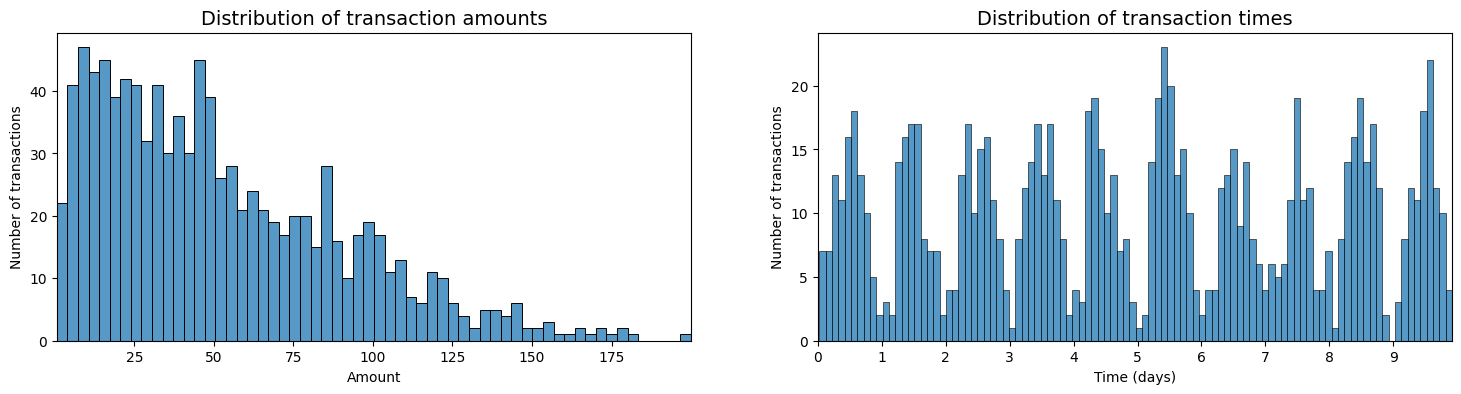

In [124]:
distribution_amount_times_fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = transactions_df[transactions_df.TX_TIME_DAYS<10]['TX_AMOUNT'].sample(n=1000).values
time_val = transactions_df[transactions_df.TX_TIME_DAYS<10]['TX_TIME_SECONDS'].sample(n=1000).values

sns.histplot(amount_val, ax=ax[0], kde=False,bins=60)

ax[0].set_title('Distribution of transaction amounts', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set(xlabel = "Amount", ylabel="Number of transactions")

# We divide the time variables by 86400 to transform seconds to days in the plot
sns.histplot(time_val/86400, ax=ax[1], bins = 100,  kde = False)
ax[1].set_title('Distribution of transaction times', fontsize=14)
ax[1].set_xlim([min(time_val/86400), max(time_val/86400)])
ax[1].set_xticks(range(10))
ax[1].set(xlabel = "Time (days)", ylabel="Number of transactions")

1. Any transaction whose amount is more than 220 is a fraud
2. Every day, a list of two terminals is drawn at random. All transactions on these terminals in the next 28 days will be marked as fraudulent

In [125]:
transactions_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,0,2018-04-01 00:00:31,596,1997,57.16,31,0
1,1,2018-04-01 00:02:10,4961,4448,81.51,130,0
2,2,2018-04-01 00:07:56,2,1338,146.00,476,0
3,3,2018-04-01 00:09:29,4128,3730,64.49,569,0
4,4,2018-04-01 00:10:34,927,2705,50.99,634,0
...,...,...,...,...,...,...,...
1754150,1754150,2018-09-30 23:56:36,161,7152,54.24,15810996,182
1754151,1754151,2018-09-30 23:57:38,4342,5486,1.23,15811058,182
1754152,1754152,2018-09-30 23:58:21,618,3727,6.62,15811101,182
1754153,1754153,2018-09-30 23:59:52,4056,1039,55.40,15811192,182


In [ ]:
transactions_df['TX_FRAUD'] = 0
transactions_df['TX_FRAUD_SCENARIO'] = 0

transactions_df.loc[transactions_df.TX_AMOUNT>220, 'TX_FRAUD'] = 1
transactions_df.loc[transactions_df.TX_AMOUNT>220, 'TX_FRAUD_SCENARIO'] = 1
nb_frauds_scenario_1 = transactions_df.TX_FRAUD.sum()
print("Number of frauds from scenario 1: "+str(nb_frauds_scenario_1))

for day in range(transactions_df.TX_TIME_DAYS.max()):

    compromised_terminals = terminal_profiles_table.TERMINAL_ID.sample(n=2, random_state=day)

    compromised_transactions = transactions_df[(transactions_df.TX_TIME_DAYS>=day) &
                                                (transactions_df.TX_TIME_DAYS<day+28) &
                                                (transactions_df.TERMINAL_ID.isin(compromised_terminals))]
    transactions_df.loc[compromised_transactions.index,'TX_FRAUD'] = 1
    transactions_df.loc[compromised_transactions.index,'TX_FRAUD_SCENARIO'] = 1

nb_frauds_scenario_2 = transactions_df.TX_FRAUD.sum() - nb_frauds_scenario_1
print("Number of frauds from scenario 2: "+str(nb_frauds_scenario_2))


Number of frauds from scenario 1: 978
Number of frauds from scenario 2: 9177


In [127]:
def add_frauds(customer_profiles_table, terminal_profiles_table, transactions_df):

    # By default, all transactions are genuine
    transactions_df['TX_FRAUD']=0
    transactions_df['TX_FRAUD_SCENARIO']=0

    # Scenario 1
    transactions_df.loc[transactions_df.TX_AMOUNT>220, 'TX_FRAUD']=1
    transactions_df.loc[transactions_df.TX_AMOUNT>220, 'TX_FRAUD_SCENARIO']=1
    nb_frauds_scenario_1=transactions_df.TX_FRAUD.sum()
    print("Number of frauds from scenario 1: "+str(nb_frauds_scenario_1))

    # Scenario 2
    for day in range(transactions_df.TX_TIME_DAYS.max()):

        compromised_terminals = terminal_profiles_table.TERMINAL_ID.sample(n=2, random_state=day)

        compromised_transactions=transactions_df[(transactions_df.TX_TIME_DAYS>=day) &
                                                    (transactions_df.TX_TIME_DAYS<day+28) &
                                                    (transactions_df.TERMINAL_ID.isin(compromised_terminals))]

        transactions_df.loc[compromised_transactions.index,'TX_FRAUD']=1
        transactions_df.loc[compromised_transactions.index,'TX_FRAUD_SCENARIO']=2

    nb_frauds_scenario_2=transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_1
    print("Number of frauds from scenario 2: "+str(nb_frauds_scenario_2))

    # Scenario 3
    for day in range(transactions_df.TX_TIME_DAYS.max()):

        compromised_customers = customer_profiles_table.CUSTOMER_ID.sample(n=3, random_state=day).values

        compromised_transactions=transactions_df[(transactions_df.TX_TIME_DAYS>=day) &
                                                    (transactions_df.TX_TIME_DAYS<day+14) &
                                                    (transactions_df.CUSTOMER_ID.isin(compromised_customers))]

        nb_compromised_transactions=len(compromised_transactions)


        random.seed(day)
        index_fauds = random.sample(list(compromised_transactions.index.values),k=int(nb_compromised_transactions/3))

        transactions_df.loc[index_fauds,'TX_AMOUNT']=transactions_df.loc[index_fauds,'TX_AMOUNT']*5
        transactions_df.loc[index_fauds,'TX_FRAUD']=1
        transactions_df.loc[index_fauds,'TX_FRAUD_SCENARIO']=3


    nb_frauds_scenario_3=transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_2-nb_frauds_scenario_1
    print("Number of frauds from scenario 3: "+str(nb_frauds_scenario_3))

    return transactions_df

In [128]:
%time transactions_df = add_frauds(customer_profiles_table, terminal_profiles_table, transactions_df)


Number of frauds from scenario 1: 978
Number of frauds from scenario 2: 9177
Number of frauds from scenario 3: 4608
CPU times: user 1min 14s, sys: 3.99 ms, total: 1min 14s
Wall time: 1min 14s


In [129]:
transactions_df.TX_FRAUD.mean() #Percentage of fraudulent transactions

np.float64(0.008416017968765588)

In [130]:
transactions_df.TX_FRAUD.sum() #Number of fraudulent transactions


np.int64(14763)

In [131]:
transactions_df.head()


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,1997,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,4448,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1338,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,3730,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,2705,50.99,634,0,0,0


In [132]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==1].shape


(973, 9)

In [133]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==2].shape


(9159, 9)

In [134]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==3].shape


(4631, 9)

In [143]:
transactions_df[transactions_df['TX_FRAUD']>0].groupby(['TX_TIME_DAYS']).CUSTOMER_ID.nunique()

TX_TIME_DAYS
0       4
1      12
2      12
3      14
4      17
       ..
178    83
179    66
180    80
181    73
182    91
Name: CUSTOMER_ID, Length: 183, dtype: int64

In [146]:
def get_stats(transactions_df):
    #Number of transaction
    nb_tx_per_day = transactions_df.groupby(['TX_TIME_DAYS'])['CUSTOMER_ID'].count()
    #Number of fraudulent transactions per day
    nb_fraud_per_day = transactions_df.groupby('TX_TIME_DAYS')['TX_FRAUD'].sum()
    #Number of fraudulent cards per day
    nb_fraudcard_per_day = transactions_df[transactions_df['TX_FRAUD']>0].groupby(['TX_TIME_DAYS']).CUSTOMER_ID.nunique()

    return (nb_tx_per_day, nb_fraud_per_day, nb_fraudcard_per_day)

(nb_tx_per_day,nb_fraud_per_day,nb_fraudcard_per_day)=get_stats(transactions_df)

n_days=len(nb_tx_per_day)
tx_stats = pd.DataFrame({"value":}

In [156]:
n_days

183

In [163]:
tx_stats=pd.DataFrame({"value":pd.concat([nb_tx_per_day/50,nb_fraud_per_day,nb_fraudcard_per_day])})
tx_stats['stat_type']=["nb_tx_per_day"]*n_days+["nb_fraud_per_day"]*n_days+["nb_fraudcard_per_day"]*n_days
tx_stats=tx_stats.reset_index()


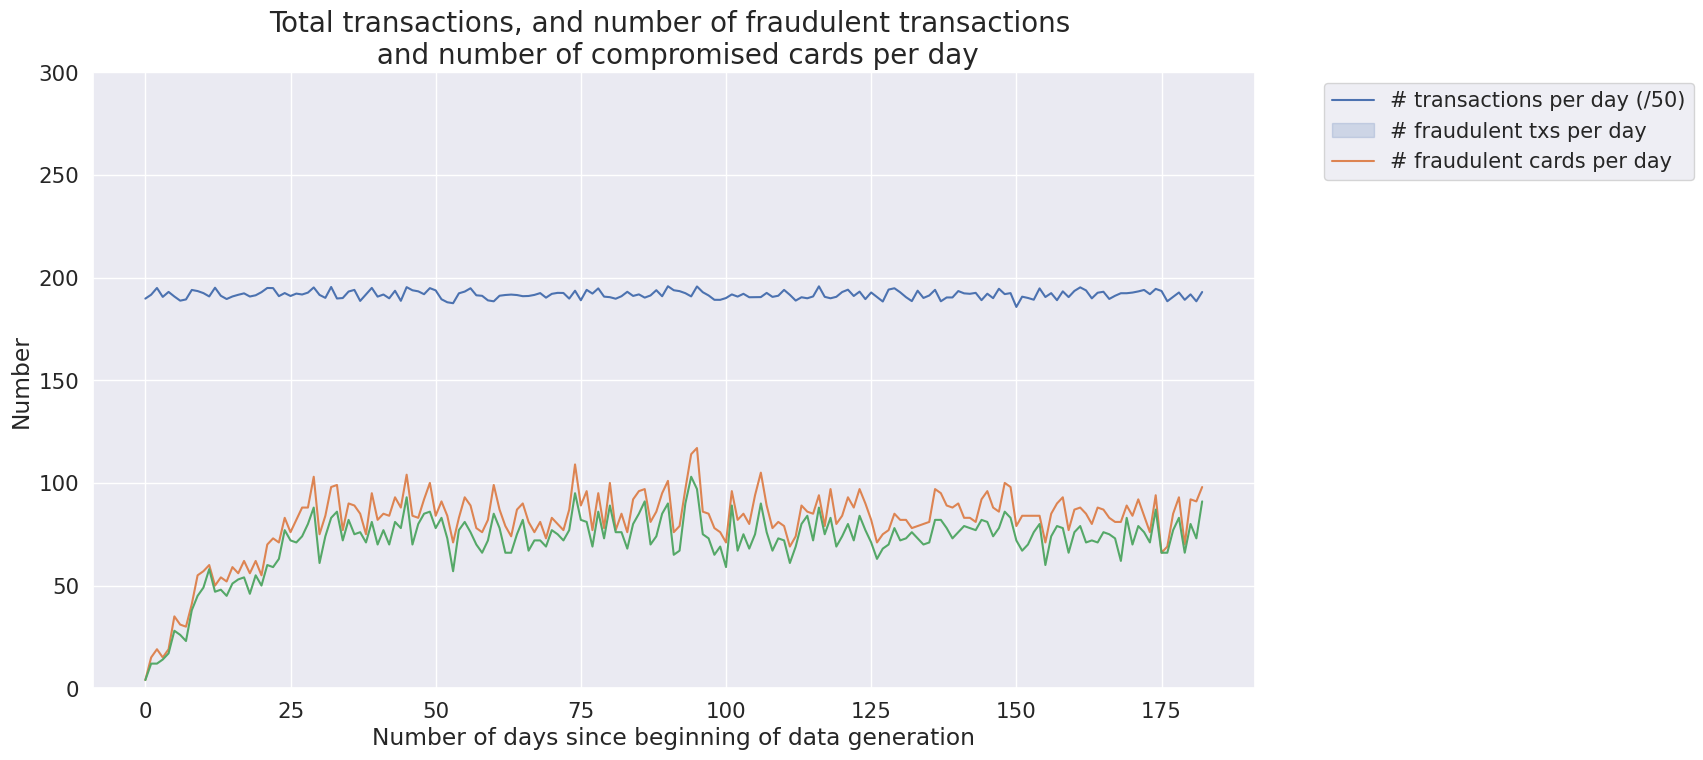

In [168]:
sns.set(style='darkgrid')
sns.set(font_scale=1.4)

fraud_and_transactions_stats_fig = plt.gcf()
fraud_and_transactions_stats_fig.set_size_inches(15, 8)

sns_plot = sns.lineplot(x="TX_TIME_DAYS", y="value", data=tx_stats, hue="stat_type", hue_order=["nb_tx_per_day","nb_fraud_per_day","nb_fraudcard_per_day"], legend=False)


sns_plot.set_title('Total transactions, and number of fraudulent transactions \n and number of compromised cards per day', fontsize=20)
sns_plot.set(xlabel = "Number of days since beginning of data generation", ylabel="Number")

sns_plot.set_ylim([0,300])
labels_legend = ["# transactions per day (/50)", "# fraudulent txs per day", "# fraudulent cards per day"]

sns_plot.legend(loc='upper left', labels=labels_legend,bbox_to_anchor=(1.05, 1), fontsize=15)


In [ ]:
import os
import datetime
DIR_OUTPUT = "./simulated-data-raw/"

if not os.path.exists(DIR_OUTPUT):
    os.makedirs(DIR_OUTPUT)

start_date = datetime.datetime.strptime("2018-04-01", "%Y-%m-%d")

for day in range(transactions_df.TX_TIME_DAYS.max()+1):

    transactions_day = transactions_df[transactions_df.TX_TIME_DAYS==day].sort_values('TX_TIME_SECONDS')

    date = start_date + datetime.timedelta(days=day)
    filename_output = date.strftime("%Y-%m-%d")+'.pkl'

    # Protocol=4 required for Google Colab
    transactions_day.to_pickle(DIR_OUTPUT+filename_output, protocol=4)